# Introduction
Dans le cadre de l’UE Business Intelligence et Data Analytics, ce projet nous permet d'appliquer de manière concrète les concepts abordés en cours. L’objectif principal est de démontrer notre capacité à manipuler, nettoyer et analyser un jeu de données en utilisant des outils tels que Pandas, des techniques de nettoyage de données, et des méthodes de visualisation avancée. Ce projet est également une opportunité de développer nos compétences en collaboration au sein d’un groupe, en intégrant théorie et pratique pour résoudre une problématique précise.

Le but de ce projet, basé sur le dataset « [Financial Transactions Dataset: Analytics](https://www.kaggle.com/datasets/computingvictor/transactions-fraud-datasets) », est d’analyser les tendances d’achats des citoyens américains sur l’année 2010.

Plus précisément, nous cherchons à analyser l'impact des zones géograpghiques sur les dépenses ainsi que les transactions selon le jour et le mois.

Nous souhaitons donc observer les tendances de dépenses des citoyens américains sur l'année 2010.  
Plus précisement, nous regarderons les tendances suivantes:
-   Dépenses par zones géographiques.
-   Le nombre de transactions selon le jour, le mois.

# Setup

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.plotting.register_matplotlib_converters()
%matplotlib inline

transactions = pd.read_csv("./financial_transactions/transactions_data.csv")
transactions.set_index("id")


,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
id,,,,,,,,,,,
7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8966547,2010-12-31 23:48:00,1941,1109,$2.39,Swipe Transaction,77275,Campbell,TX,75422.0,5812,NaN
8966548,2010-12-31 23:49:00,1145,5444,$20.39,Swipe Transaction,56060,Appleton,WI,54913.0,4121,NaN
8966549,2010-12-31 23:51:00,487,2835,$85.75,Swipe Transaction,36936,Albany,NY,12203.0,4900,NaN


# Présentation des données transactions
Le dataset comporte 5 fichiers, mais seul `transactions_data.csv` nous intéresse, dont voici la structure :
- id : Colonne identifiante.
- date : La date de la transaction au format « année-mois-jour heure :minutes :secondes ».
- client_id : L’identifiant du client, repris dans le fichier `clients_data.csv`.
- card_id : L’identifiant de la carte, repris dans le fichier `cards_data.csv`.
- amount : Le montant de la transaction.
- use_chip : Le mode de paiement (Sans contact, pin, …).
- merchant_id : L’identifiant du commerçant.
- merchant_city : La ville ou s’est passé la transaction.
- merchant_state : L’ état ou s’est passé la transaction.
- zip : Le code postal ou s’est passé la transaction.
- mcc : Un code, qui permet de connaître la catégorie de l'achat. Ces codes sont repris dans le fichier `mcc_codes.json`. **Son utilisation ici ne sera pas très pertinente, nous ignorons cette colonne.**
- errors : Une description de l’erreur, s’il y en a une.
Le notebook comprend une petite présentation de certaines données.

Nous intérprétons les données suivantes:
- client_id comme Client
- merchant_xxx comme Magasin

In [2]:
transactions.groupby('client_id').client_id.count() # 1137 clients uniques


client_id
0       1113
1        997
2       1025
3        527
4       1504
        ... 
1994      64
1995    1191
1996     849
1997    1080
1998     388
Name: client_id, Length: 1137, dtype: int64

In [3]:
# Classement de la plus grosse transaction par magasin et par état

transactions.groupby(["merchant_state", "merchant_id"]).apply(lambda df: df.loc[df.amount.idxmax()]).amount
# On groupe les états et les identifiants des magasins, et on trie le montant de chaque transaction (ASC)
# Et on y lie le montant correspondant.

C:\Users\willi\AppData\Local\Temp\ipykernel_17272\1003607640.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transactions.groupby(["merchant_state", "merchant_id"]).apply(lambda df: df.loc[df.amount.idxmax()]).amount


merchant_state  merchant_id
AK              2602           $128.44
                5248            $84.21
                7257           $751.42
                11468           $34.24
                12636           $25.32
                                ...   
WY              90461            $9.79
                90709           $93.48
                92883           $56.69
                94625           $32.15
                96049           $74.82
Name: amount, Length: 41378, dtype: object

In [4]:
# Le nombre de transactions, le montant minimum et maximum, par état
transactions.groupby(["merchant_state"]).amount.agg([len, min, max])

C:\Users\willi\AppData\Local\Temp\ipykernel_17272\3133034948.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  transactions.groupby(["merchant_state"]).amount.agg([len, min, max])
C:\Users\willi\AppData\Local\Temp\ipykernel_17272\3133034948.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  transactions.groupby(["merchant_state"]).amount.agg([len, min, max])


,len,min,max
merchant_state,,,
AK,793,$-102.00,$99.79
AL,16670,$-100.00,$999.00
AR,9554,$-100.00,$99.89
AZ,18554,$-100.00,$99.99
Andorra,32,$10.76,$47.64
...,...,...,...
Vietnam,11,$-219.00,$264.37
WA,29038,$-100.00,$998.37
WI,17067,$-100.00,$99.98



#### Nous allons d'abord retirer les transactions venant d'autres pays, elles ne nous intéressent pas dans ce projet.

In [5]:

drop_indexes = transactions[ (transactions["merchant_state"].str.len() > 2) ].index;

transactions = transactions.drop(drop_indexes)

# Traitement des valeurs nulles
Lorsqu'une transaction est faite en ligne, le code postal et l'état du magasin ne peuvent pas exister.
Nous allons donc remplacer ces cellules vides pour une meilleure visibilité et un futur traitement de ces données.

Aussi, certaines transactions peuvent être erronées. Celles qui ne le sont pas auront la mention "No error"


In [6]:
# Certaines valeurs sont nulles lorsque 'use_chip' est égal à 'Online Transaction'. C'est le cas de merchant_state et zip.
transactions[pd.isnull(transactions.merchant_state)]


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
7,7475335,2010-01-01 00:14:00,1684,2140,$26.46,Online Transaction,39021,ONLINE,NaN,NaN,4784,NaN
8,7475336,2010-01-01 00:21:00,335,5131,$261.58,Online Transaction,50292,ONLINE,NaN,NaN,7801,NaN
18,7475346,2010-01-01 00:34:00,394,4717,$26.04,Online Transaction,39021,ONLINE,NaN,NaN,4784,NaN
24,7475353,2010-01-01 00:43:00,301,3742,$10.17,Online Transaction,39021,ONLINE,NaN,NaN,4784,NaN
26,7475356,2010-01-01 00:45:00,566,3439,$16.86,Online Transaction,16798,ONLINE,NaN,NaN,4121,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1240846,8966515,2010-12-31 23:08:00,1852,28,$20.48,Online Transaction,18563,ONLINE,NaN,NaN,4121,NaN
1240857,8966527,2010-12-31 23:28:00,1788,2538,$193.39,Online Transaction,73186,ONLINE,NaN,NaN,4814,NaN
1240858,8966528,2010-12-31 23:29:00,584,51,$269.30,Online Transaction,74934,ONLINE,NaN,NaN,3596,NaN
1240860,8966530,2010-12-31 23:31:00,1875,5955,$10.57,Online Transaction,39261,ONLINE,NaN,NaN,5815,NaN


In [7]:
# Nous remplaçons ces cellules vides par une information plus pertinente
transactions.merchant_state = transactions.merchant_state.fillna("Online")
transactions.zip = transactions.zip.fillna("Unknown")

# Vérifions bien que les états ne sont plus nuls.
pd.Series([transactions.merchant_state.isnull().sum(), transactions.zip.isnull().sum()], ["merchant_state", "zip"])


merchant_state    0
zip               0
dtype: int64

In [8]:
# Message d'erreur par défaut
transactions.errors = transactions.errors.fillna("No error")

In [9]:
# Présentation des données nettoyées des valeurs nulles.
# On voit bien les modifications appliquées sur les colonnes merchant_state, zip, et errors
transactions.loc[transactions.use_chip == "Online Transaction"].head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
7,7475335,2010-01-01 00:14:00,1684,2140,$26.46,Online Transaction,39021,ONLINE,Online,Unknown,4784,No error
8,7475336,2010-01-01 00:21:00,335,5131,$261.58,Online Transaction,50292,ONLINE,Online,Unknown,7801,No error
18,7475346,2010-01-01 00:34:00,394,4717,$26.04,Online Transaction,39021,ONLINE,Online,Unknown,4784,No error
24,7475353,2010-01-01 00:43:00,301,3742,$10.17,Online Transaction,39021,ONLINE,Online,Unknown,4784,No error
26,7475356,2010-01-01 00:45:00,566,3439,$16.86,Online Transaction,16798,ONLINE,Online,Unknown,4121,No error


# Suppression des valeur avec une erreur
Il y a des transactions qui comporte une erreur tel qu'un mauvais code PIN, un mauvais CVV, etc. Ces transactions n'ont donc pas eu lieu, il faut les supprimer.

In [10]:
transactions.loc[transactions.errors != "No error"]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
166,7475516,2010-01-01 04:56:00,464,3233,$104.10,Swipe Transaction,32175,Orlando,FL,32804.0,7538,Technical Glitch
248,7475611,2010-01-01 06:10:00,1797,1127,$28.84,Online Transaction,15143,ONLINE,Online,Unknown,4784,Bad Expiration
275,7475643,2010-01-01 06:19:00,1797,1127,$38.58,Online Transaction,15143,ONLINE,Online,Unknown,4784,Bad Card Number
401,7475792,2010-01-01 07:02:00,1424,4710,$-72.00,Swipe Transaction,59935,Kingman,AZ,86401.0,5499,Insufficient Balance
483,7475881,2010-01-01 07:22:00,843,184,$37.54,Swipe Transaction,89462,Terre Haute,IN,47805.0,5300,Insufficient Balance
...,...,...,...,...,...,...,...,...,...,...,...,...
1240592,8966219,2010-12-31 20:48:00,474,2218,$18.38,Swipe Transaction,54850,Arverne,NY,11692.0,4814,Bad PIN
1240614,8966242,2010-12-31 20:57:00,293,4260,$10.33,Swipe Transaction,39754,Norman,OK,73071.0,4121,Bad PIN
1240684,8966326,2010-12-31 21:35:00,1298,1226,$21.72,Online Transaction,18563,ONLINE,Online,Unknown,4121,Bad CVV
1240732,8966380,2010-12-31 22:01:00,961,4584,$50.34,Swipe Transaction,69972,Odessa,FL,33556.0,5814,Insufficient Balance


In [11]:
drop_indexes = transactions[ (transactions["errors"] != "No error") ].index;
transactions = transactions.drop(drop_indexes)

# Nettoyage des données
Maintenant que les données sont complètes, il faut les rendres plus simple à manipuler.

C'est notamment le cas de la colonne "amount", qui est actuellement une chaîne de caractères, car elle commence par le symbole monétaire.
Bien que cela reste lisible pour nous, cette colonne ne peut pas être manipulée pour des chiffres.

Par exemple, on peut voir ci-dessous que la plus grande valeur (**top**) est $80.00, malgré la présences de transactions dépassant les $1000.
Mais, si l'on compare caractère par caractère, $1 est plus petit que $8, donc c'est $80.00 qui sortira vainqueur de cette comparaison.

In [12]:
transactions.amount.describe()

count     1214384
unique      36889
top       $100.00
freq        12266
Name: amount, dtype: object

In [13]:
# On convertit la colonne en valeur numérique, en retirant le premier caractère de la colonne 'amount'
transactions.amount = pd.to_numeric(transactions.amount.str[1:])
transactions.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,No error
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,No error
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,No error
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,No error
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,No error


### Actuellement, la colonne **date** est considérée comme un string par pandas.
On va la convertir en date pour pouvoir la manipuler efficacement.  
Nous allons également en profiter pour enregistrer le mois et le jour de la transaction.

In [14]:
transactions["parsed_date"] = pd.to_datetime(transactions.date, format="%Y-%m-%d %H:%M:%S")

transactions["month"] = transactions["parsed_date"].apply(lambda d: d.month)
transactions["day"] = transactions["parsed_date"].apply(lambda d: d.day)

transactions.tail()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,parsed_date,month,day
1240875,8966547,2010-12-31 23:48:00,1941,1109,2.39,Swipe Transaction,77275,Campbell,TX,75422.0,5812,No error,2010-12-31 23:48:00,12,31
1240876,8966548,2010-12-31 23:49:00,1145,5444,20.39,Swipe Transaction,56060,Appleton,WI,54913.0,4121,No error,2010-12-31 23:49:00,12,31
1240877,8966549,2010-12-31 23:51:00,487,2835,85.75,Swipe Transaction,36936,Albany,NY,12203.0,4900,No error,2010-12-31 23:51:00,12,31
1240878,8966550,2010-12-31 23:54:00,234,2052,60.00,Swipe Transaction,27092,Dallas,TX,75208.0,4829,No error,2010-12-31 23:54:00,12,31
1240879,8966551,2010-12-31 23:56:00,162,2240,140.96,Swipe Transaction,15574,Mcallen,TX,78503.0,3393,No error,2010-12-31 23:56:00,12,31


### Suppression des données
Nous supposons qu'un client ne peut faire 2 transactions au même moment avec la même carte, nous allons les retirer.



In [15]:
transactions_before_removal = transactions;

transactions = transactions.drop_duplicates(subset=['parsed_date', 'client_id', 'card_id'], keep="last")


# On peut observer une suppression de 7220 doublons
pd.Series([transactions_before_removal.shape[0], transactions.shape[0]])


0    1214384
1    1207737
dtype: int64

# Réponse à la problématique
Maintenant que les données sont nettoyées, nous pouvons tenter de répondre à la problématique.  
Pour rappel, nous souhaitons observer les tendances de dépenses des citoyens américains sur l'année 2010.  
Plus précisement, nous regarderons les tendances suivantes:
-   Dépenses par zones géographiques.
-   Le nombre de transactions selon le jour, le mois.

In [16]:
# Avant, observation du montant de toutes les transactions
transactions.amount.describe()

count    1.207737e+06
mean     4.359571e+01
std      8.483781e+01
min     -5.000000e+02
25%      8.960000e+00
50%      2.908000e+01
75%      6.440000e+01
max      6.820200e+03
Name: amount, dtype: float64

In [17]:
# Nombre de transactions négatives
transactions.amount.lt(0).sum()

np.int64(60532)

<Axes: title={'center': 'Dépenses totales par état'}, xlabel='État', ylabel='Montant total'>

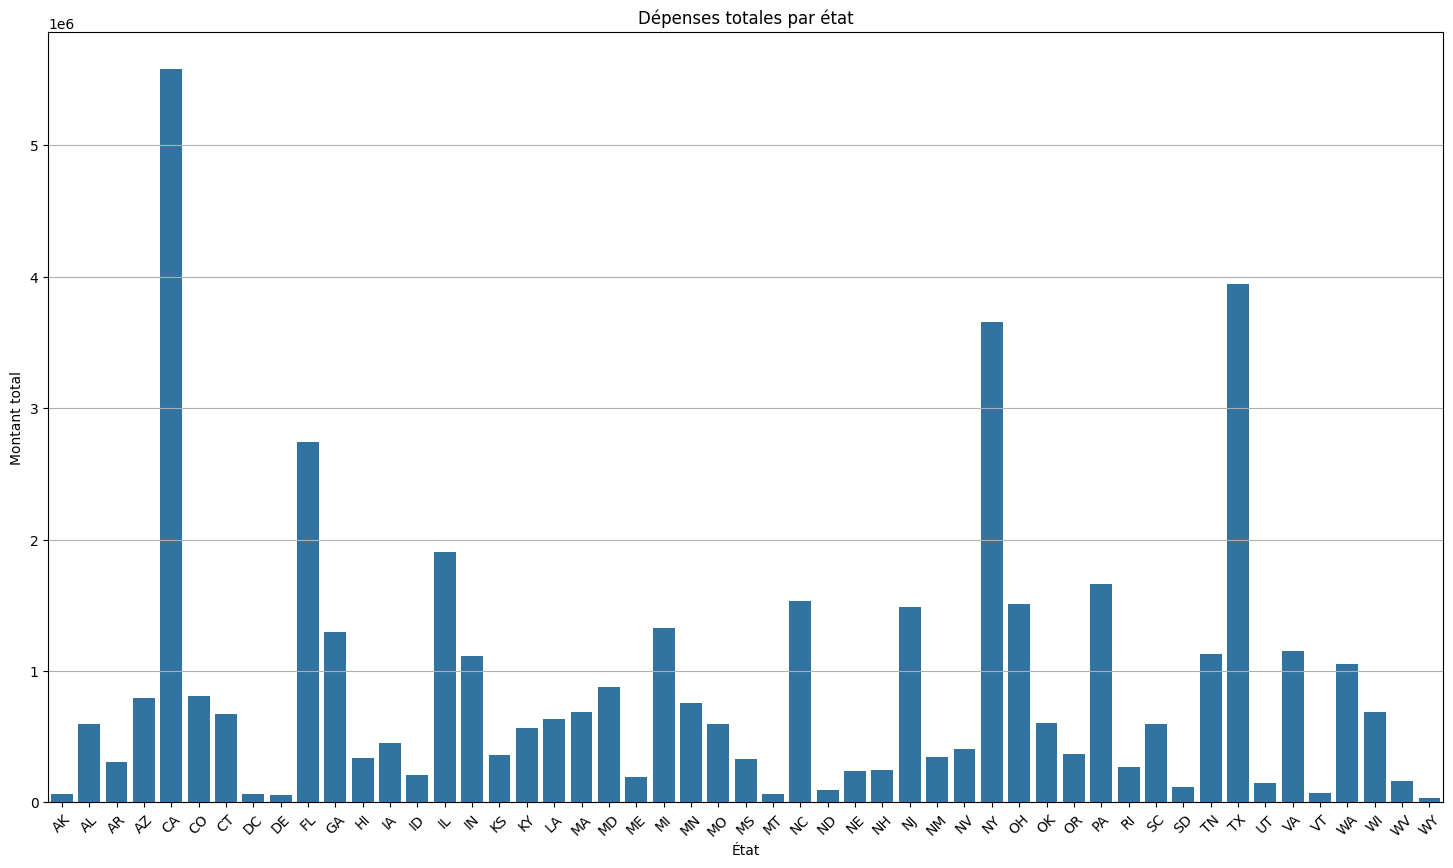

In [18]:
# Dépenses par zones géographiques
plt.figure(figsize=(18,10))
plt.title("Dépenses totales par état")
plt.xlabel("État")
plt.ylabel("Montant total")
plt.xticks(rotation=45)
plt.grid(True)

# Montant des dépenses par état (utilisation en dessous du graphique)
transactions_by_state = transactions.groupby(['merchant_state']).amount
amount_by_state = transactions_by_state.sum()

# Montant des dépenses par état sans online
transactions_without_online = transactions[transactions["merchant_state"] != "Online"]
transactions_by_state_without_online = transactions_without_online.groupby(["merchant_state"]).amount
amount_by_state_without_online = transactions_by_state_without_online.sum()

sns.barplot(x=list(transactions_by_state_without_online.indices), y=amount_by_state_without_online)


In [19]:
pd.Series([amount_by_state["CA"], amount_by_state["Online"], amount_by_state.sum(), amount_by_state.drop("Online").sum()], ["Californie", "En ligne", "Total", "Total sans en ligne"])

Californie              5580274.64
En ligne                7742196.98
Total                  52652147.96
Total sans en ligne    44909950.98
dtype: float64

In [20]:
percentage_online = (amount_by_state["Online"].sum() / amount_by_state.sum()) * 100
print(f"Pourcentage des dépenses en ligne : {percentage_online:.2f} %")

Pourcentage des dépenses en ligne : 14.70 %


Ce graphique nous permet de voir que l'état CA (**Californie**) est le plus dépensier, avec plus de 5.500.000 dollars de dépenses en tout.  
Nous en avons profité pour voir les dépenses en ligne des américains. Seulement 14,70% du montant des dépenses est en ligne soit plus de 7.700.000 dollars en tout.  

Ci-dessous, nous pouvons observer que la moyenne de dépense par état est de 1.012.541 dollars

In [21]:
round(float(amount_by_state.describe()["mean"]), 2)

1012541.31

### Tendances de dépenses selon la période

count    1.200000e+01
mean     4.387679e+06
std      1.596971e+05
min      3.987743e+06
25%      4.337200e+06
50%      4.407419e+06
75%      4.497079e+06
max      4.554180e+06
Name: amount, dtype: float64

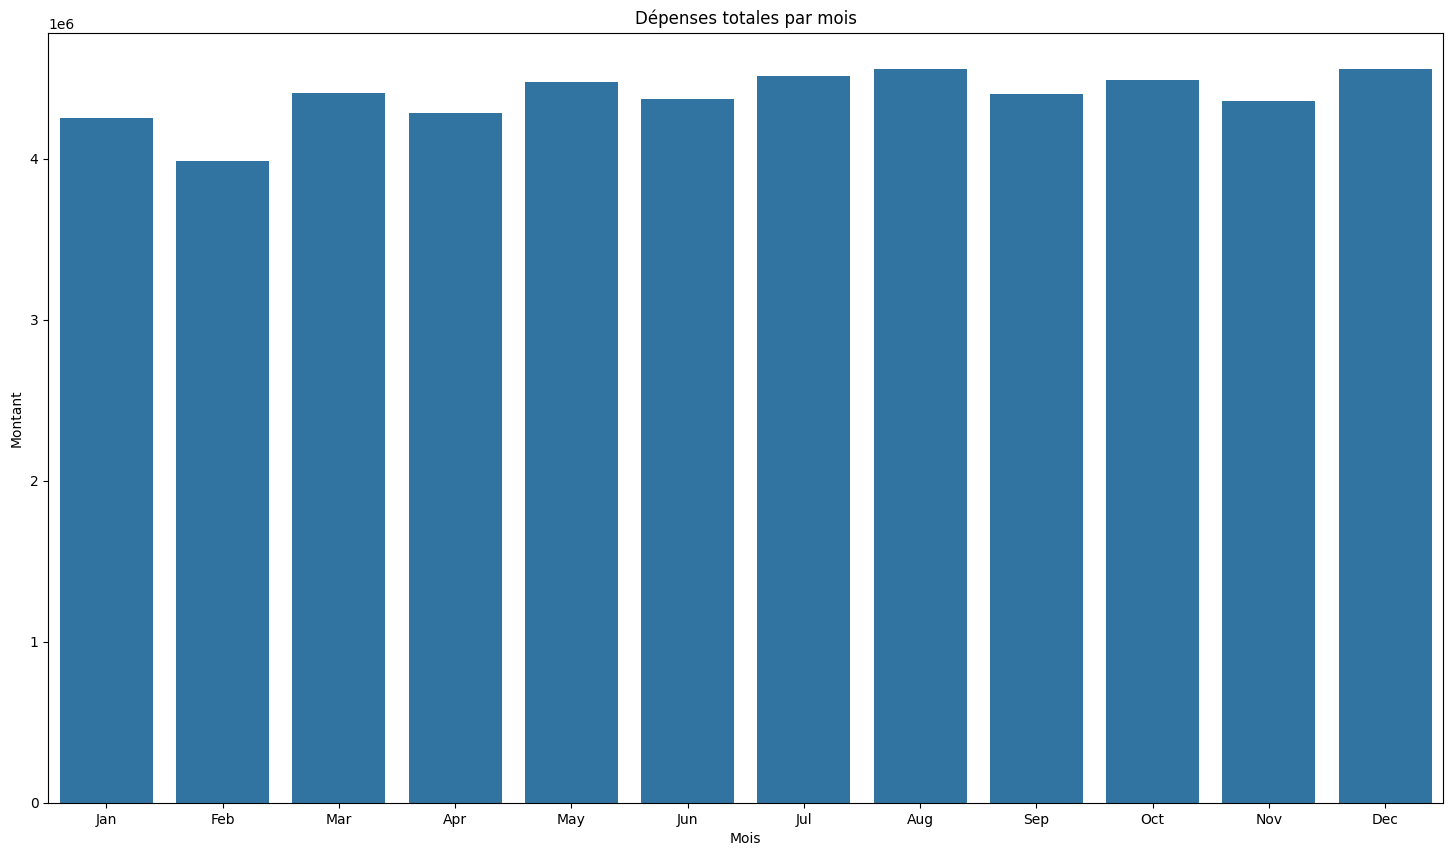

In [22]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(18,10))
plt.title("Dépenses totales par mois")
plt.xlabel("Mois")
plt.ylabel("Montant")

transactions_by_date = transactions.groupby(['month']).amount
amount_by_date = transactions_by_date.sum()
sns.barplot(x=months, y=amount_by_date)
amount_by_date.describe()



Étant donné que le nombre de transactions est très grand, ce graphique est très compact.  
Nous allons donc nous intéresser à un état en particulier, et observer son évolution en fonction des mois.

<Axes: title={'center': 'Dépenses par mois: CA'}, xlabel='Mois', ylabel='Montant'>

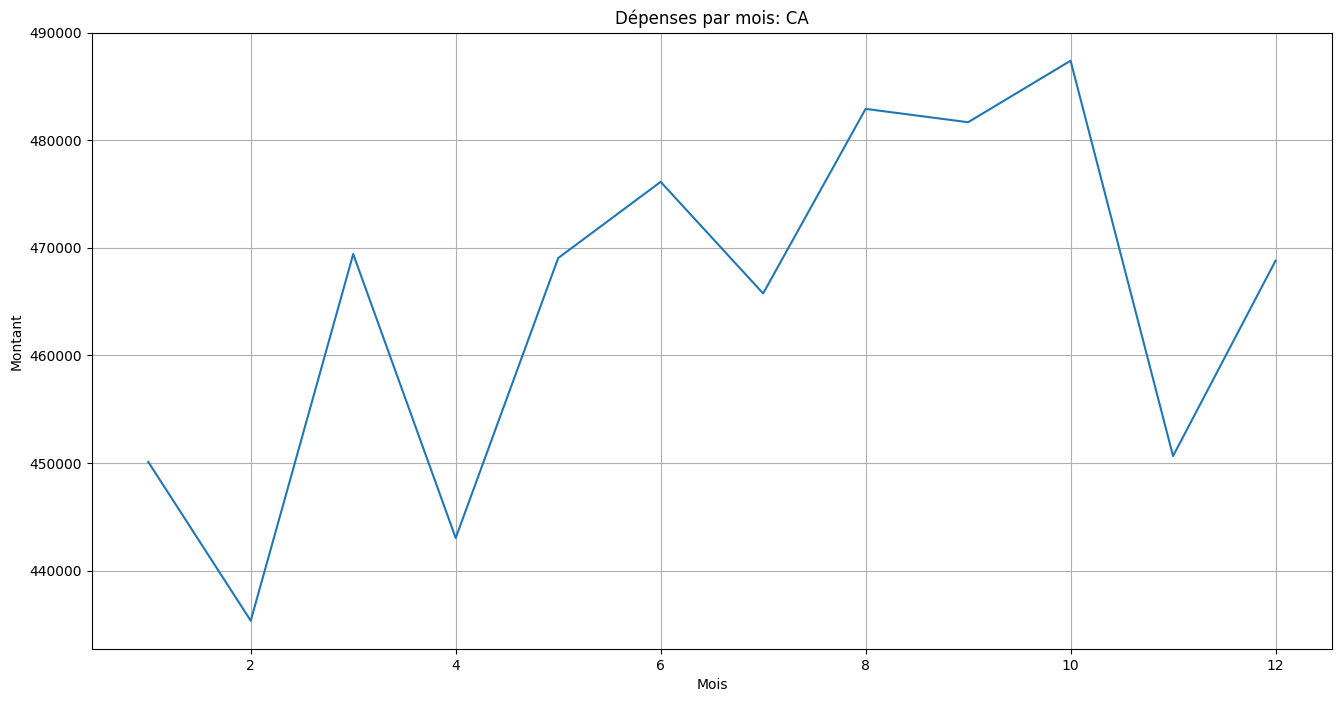

In [23]:

plt.figure(figsize=(16,8))

observed_state = "CA"
plt.title("Dépenses par mois: " + observed_state)
plt.xlabel("Mois")
plt.ylabel("Montant")
plt.grid(True)

amount_by_state_per_month = transactions.groupby(['merchant_state', 'month']).amount.sum()

sns.lineplot(data=amount_by_state_per_month[observed_state])

Pour observer un autre état, il suffit de modifier la variable **observed_state**.  
Il est très clair que le mois le plus actif est le mois d'octobre.  
En extrapolant un peu, ce pic est potentiellement lié à Thanksgiving, ou bien Noël pour les plus prévoyants.  

##### Et si on observait cette même tendance en ligne ?

<Axes: title={'center': 'Dépenses par mois en ligne'}, xlabel='Mois', ylabel='Montant'>

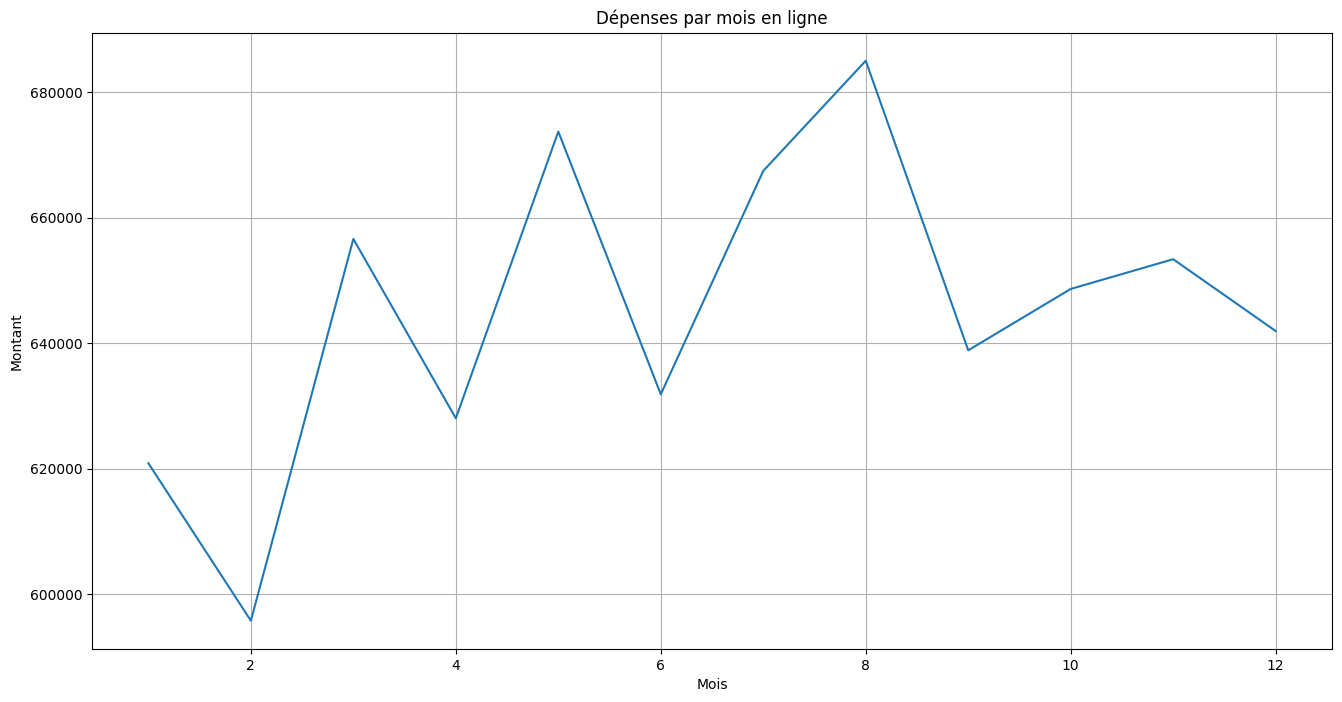

In [24]:
amount_by_state_per_month = transactions.groupby(['merchant_state', 'month']).amount.sum()

plt.figure(figsize=(16,8))
plt.title("Dépenses par mois en ligne")
plt.xlabel("Mois")
plt.ylabel("Montant")
plt.grid(True)

sns.lineplot(data=amount_by_state_per_month["Online"])

On peut observer qu'en ligne, la tendance d'achat semble augmenter les mois impairs.  
Nous pensons que cette information n'est pas cohérente et n'est liée à aucun évènement en particulier.

#### Pour finir: La tendance journalière

<Axes: title={'center': 'Observation du mois: Dec'}, xlabel='Jour du mois', ylabel='Montant'>

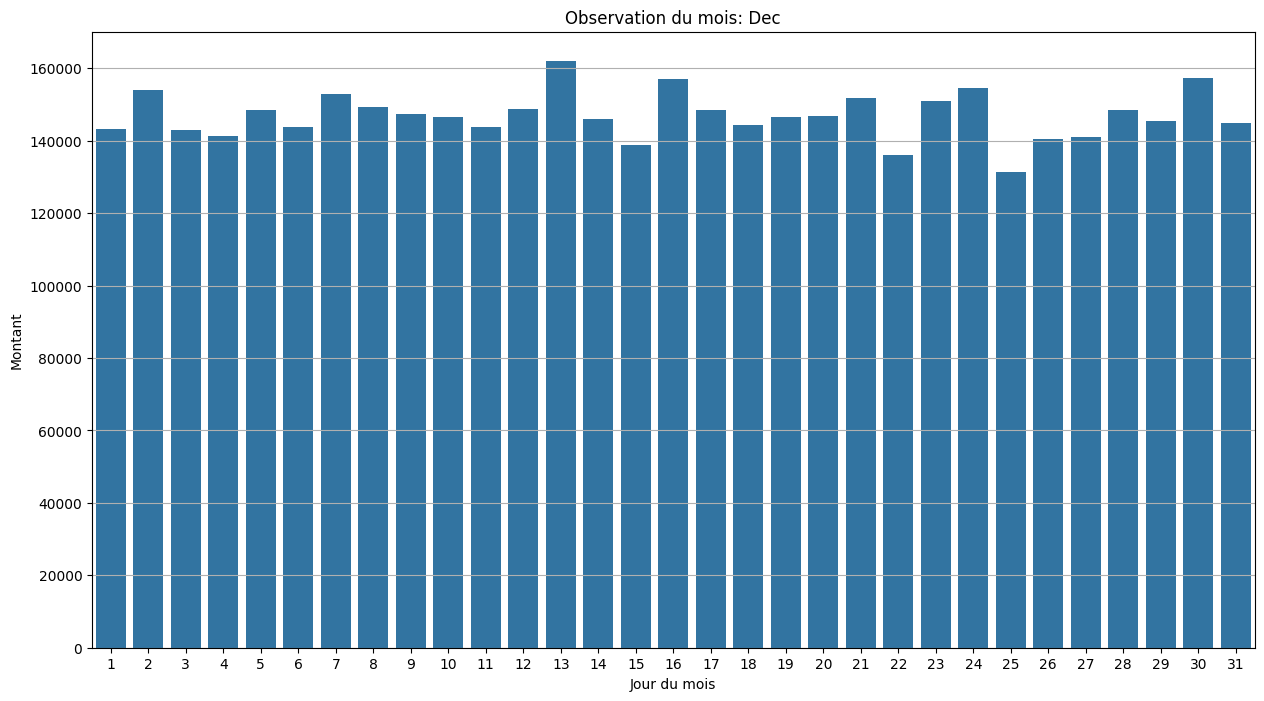

In [25]:
observed_month = 12

plt.figure(figsize=(15,8))
plt.title("Observation du mois: " + months[observed_month - 1])
plt.xlabel("Jour du mois")
plt.ylabel("Montant")
plt.grid(True)

amount_by_day_of_month = transactions.groupby(['month', 'day']).amount


sns.barplot(x=list(amount_by_day_of_month.sum()[observed_month].keys()), y=amount_by_day_of_month.sum()[observed_month])


Pour le mois de décembre par exemple, nous observons que le jour le moins "productif" est le 25 décembre:

In [26]:
pd.Series([amount_by_day_of_month.sum()[12][25], amount_by_day_of_month.sum()[12].min()], ["25 Décembre", "Jour le plus bas"])

25 Décembre         131363.34
Jour le plus bas    131363.34
dtype: float64

Probablement car il s'agit d'un jour férié; C'est également le cas du 1er janvier:

In [27]:
pd.Series([amount_by_day_of_month.sum()[1][1], amount_by_day_of_month.sum()[1].min()], ["1 Janvier", "Jour le plus bas"])


1 Janvier           121568.54
Jour le plus bas    121568.54
dtype: float64

# Conlusion
Avec ces quelques graphiques, nous observons un résultat plutôt décevant :
Les dépenses des Américains ne correspondent pas aux évènements sociaux, à l’exception de Thanksgiving en octobre (et ce n’est qu’une supposition).

Ces résultats peuvent être justifiés par ces quelques valeurs venant de toutes les transactions :
| Statistiques | Valeurs |
|:---------:|---------:|
| count | 1207737 |
| mean | 43.59571 |
| std | 84.83781 |
| min | -500 |
| 25% | 8.96 |
| 50% | 29.08 |
| 75% | 64.4 |
| max | 6820.2 |

En premier lieu, la transaction avec le plus petit montant est de -500$. Cela signifie que le commerçant a remboursé le client de 500$.
Nous pouvons trouver le nombre de transactions négatives comme ceci :
```python
transactions.amount.lt(0).sum()
```
Ce qui nous donne 60532 valeurs négatives
    ➔ 60532 valeurs qui pourraient fausser les résultats.

Nous avons quand même décider de garder ces lignes dans notre dataset, car nous pensons que supprimer toutes les entrées n’allant pas dans notre sens irait à l’encontre de cette analyse.

D’autres valeurs aberrantes. Comme le montant maximum de $6820, alors que le 3ème quartile se trouve à $64.4, peuvent venir fausser les résultats.

Il pourrait être intéressant de comparer ces données avec un dataset européen, dans le but d’observer (ou non) ces même pics en décembre ou en avril.


# Liens utiles
[Repo du projet](https://github.com/etu47734/Projet-Data-Analytics)

[Dataset d’origine](https://www.kaggle.com/datasets/computingvictor/transactions-frauddatasets?resource=download)

[Dataset modifié](https://henalluxmy.sharepoint.com/:x:/g/personal/etu47734_henallux_be/EVvNvbXaKRBFlcmoYAJD5akBuZe5XhHCQBhQFnbFR83vQ?e=AaOMES)